In [1]:
import requests

# URL of the raw CSV file in your GitHub repo
url = 'https://raw.githubusercontent.com/thongthornpatch/w3-bird-survey-analysis/main/Dec_2024_eBird_W3_Data_Summary.csv'  # Change this URL
response = requests.get(url)

# Save the content as a CSV file
with open('/content/your-file.csv', 'wb') as file:
    file.write(response.content)

# Load the CSV file into a pandas DataFrame
import pandas as pd
data = pd.read_csv('/content/your-file.csv')

# Display the first few rows
data.head()


,Site Name,Country Code,Importance index for species above 1%,Combined Importance Index,Key species,Total waterbird,LC,NT,VU,EN,...,Haematopodidae,Ibidorhynchidae,Recurvirostridae,Burhinidae,Glareolidae,Charadriidae,Scolopacidae,Pedionomidae,Thinocoridae,Laridae
0,"Guang-guang Mangrove Park and Nursery, Mati",PH,0.0,2.161653,NaN,3059,2174,238,360,287,...,0,0,10,0,0,1616,1268,0,0,40
1,"Hinactacan Ponds, Jaro",PH,0.0,0.489543,NaN,287,257,7,9,14,...,0,0,34,0,0,68,59,0,0,19
2,Panabo Coastal Road,PH,0.0,1.120759,NaN,1630,448,1022,90,70,...,0,0,66,0,0,352,1119,0,0,58
3,"Dermaga Tambak, Desa Padengo",ID,0.0,0.014925,NaN,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Dusun Mekar Indah, Desa Dudewulo",ID,0.0,0.003721,NaN,5,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1]:
!apt-get install -qq fonts-noto-cjk
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans CJK JP'


Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


Columns in the dataset: ['Site Name', 'Country Code', 'Importance index for species above 1%', 'Combined Importance Index', 'Key species', 'Total waterbird', 'LC', 'NT', 'VU', 'EN', 'CR', 'Gaviidae', 'Podicipedidae', 'Pelecanidae', 'Phalacrocoracidae', 'Anhingidae', 'Ardeidae', 'Scopidae', 'Balaenicipitidae', 'Ciconiidae', 'Threskiornithidae', 'Phoenicopteridae', 'Anhimidae', 'Anatidae', 'Gruidae', 'Aramidae', 'Rallidae', 'Heliornithidae', 'Eurypygidae', 'Jacanidae', 'Rostratulidae', 'Dromadidae', 'Haematopodidae', 'Ibidorhynchidae', 'Recurvirostridae', 'Burhinidae', 'Glareolidae', 'Charadriidae', 'Scolopacidae', 'Pedionomidae', 'Thinocoridae', 'Laridae']


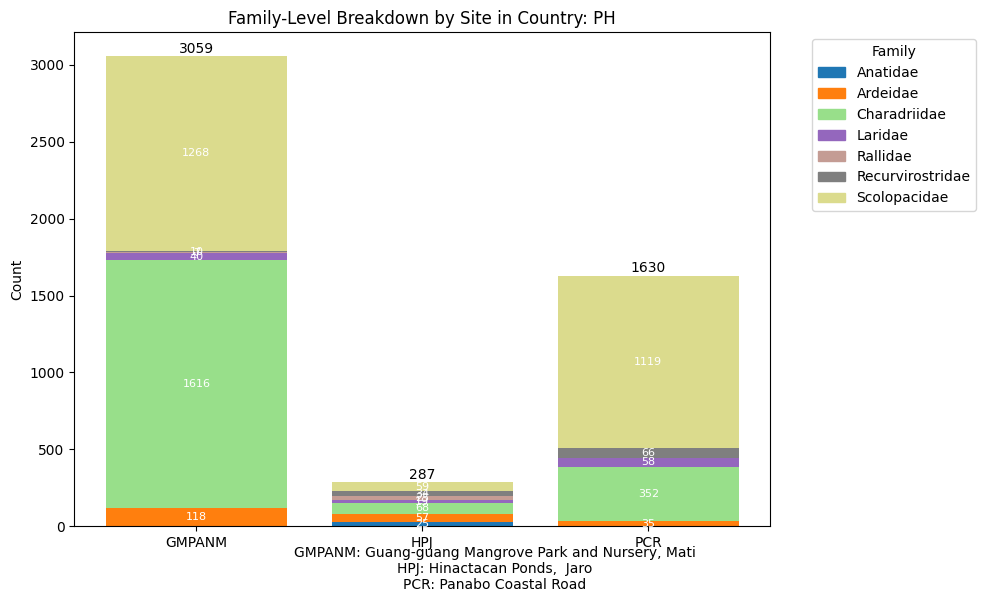

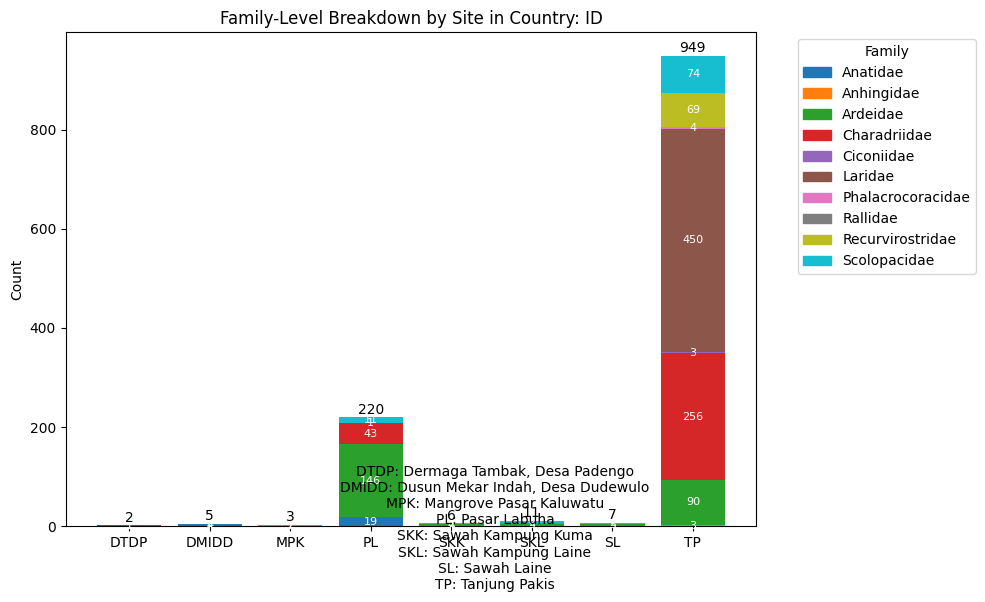

<ipython-input-3-ca23c766b638>:116: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
<ipython-input-3-ca23c766b638>:116: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
<ipython-input-3-ca23c766b638>:116: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarni

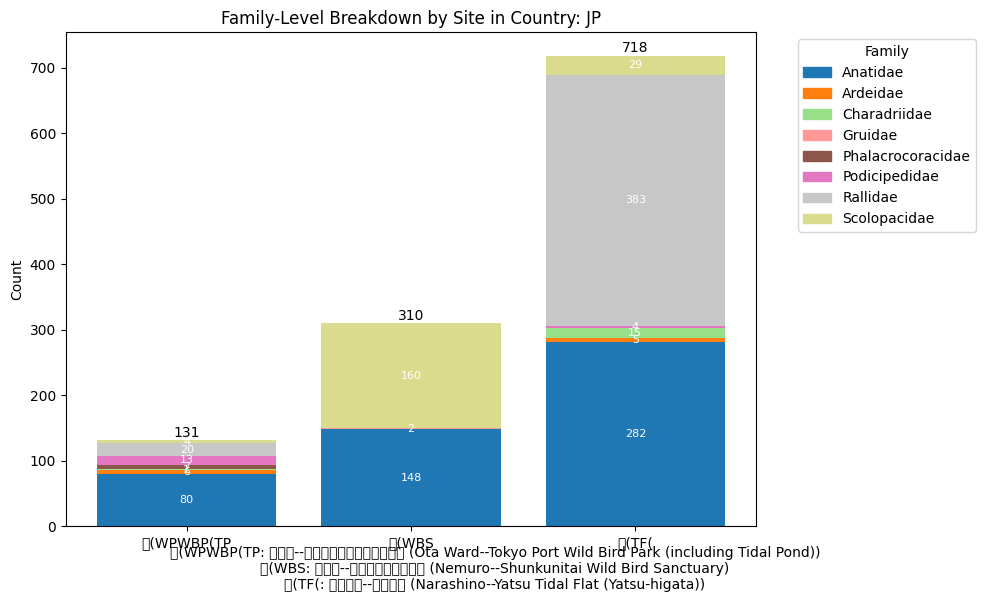

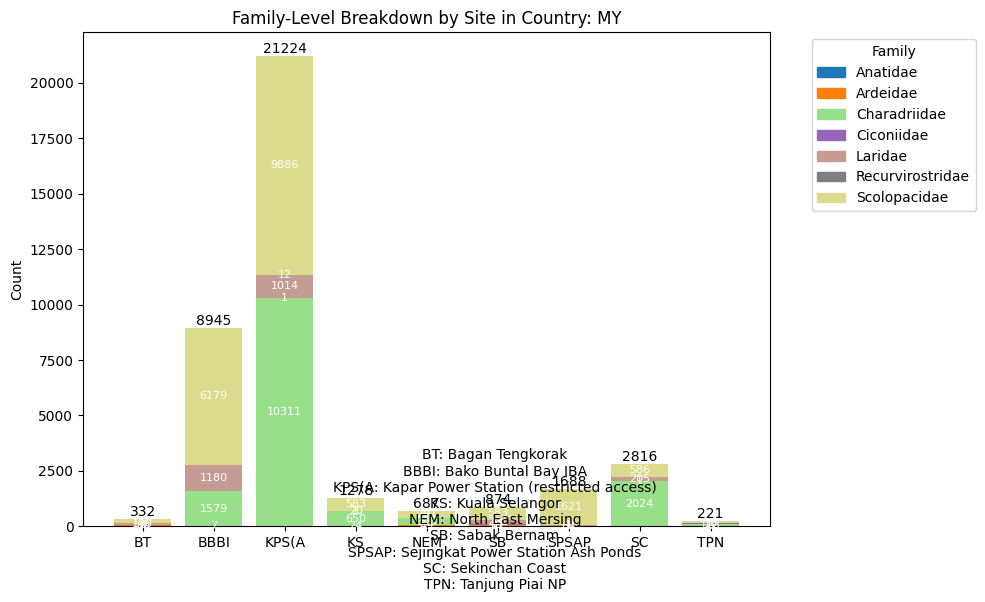

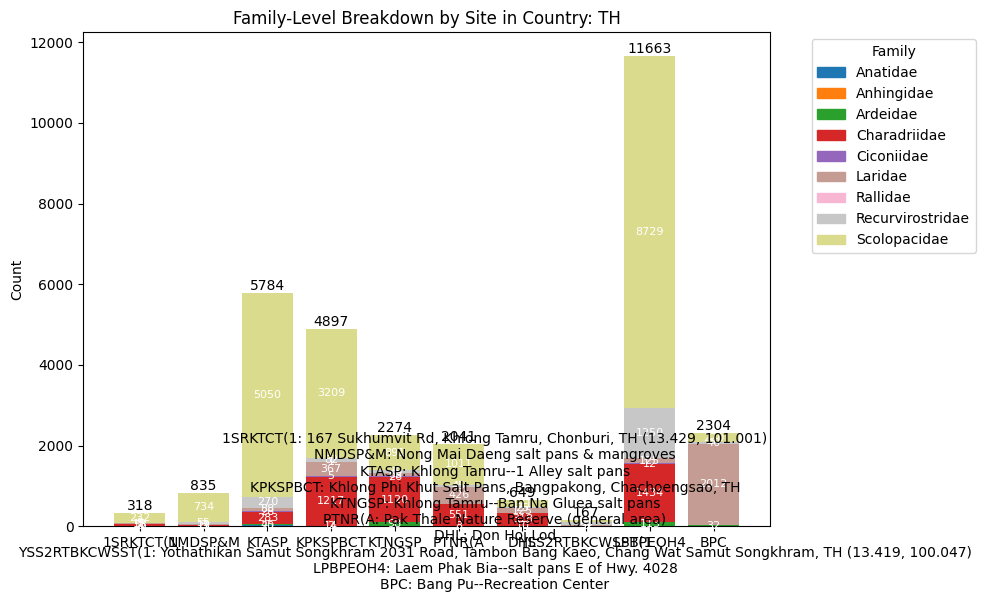

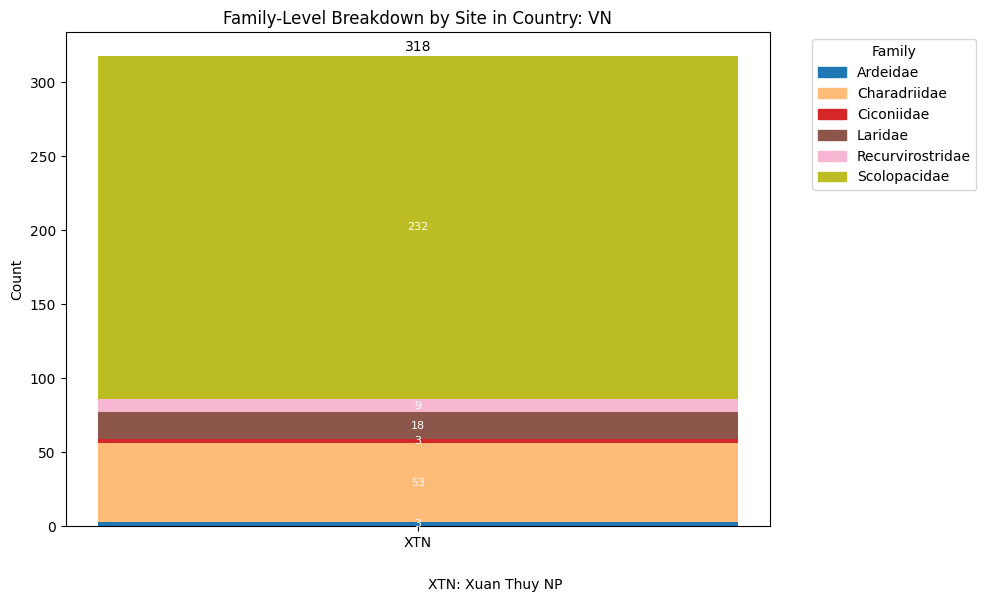

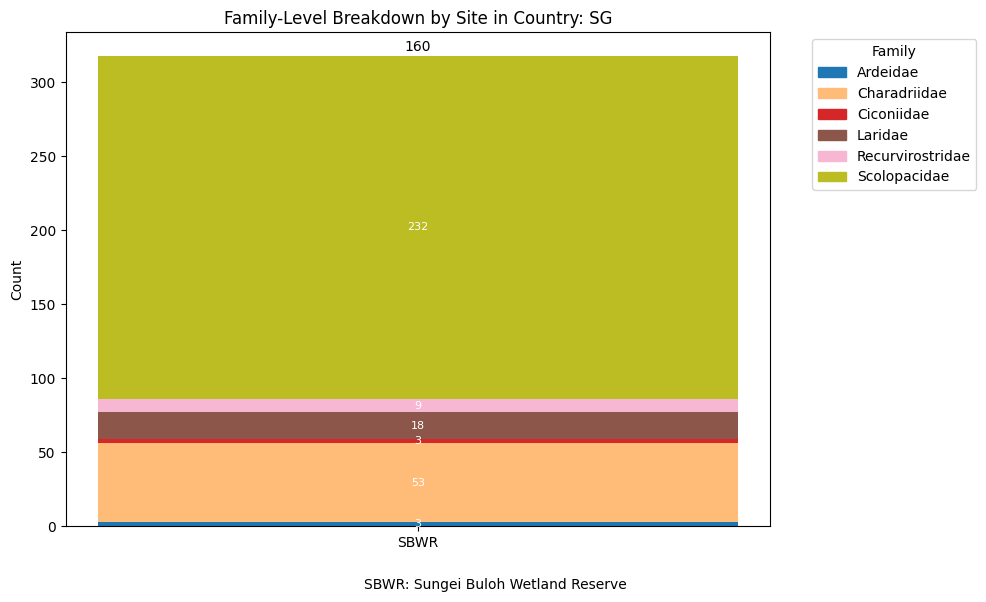

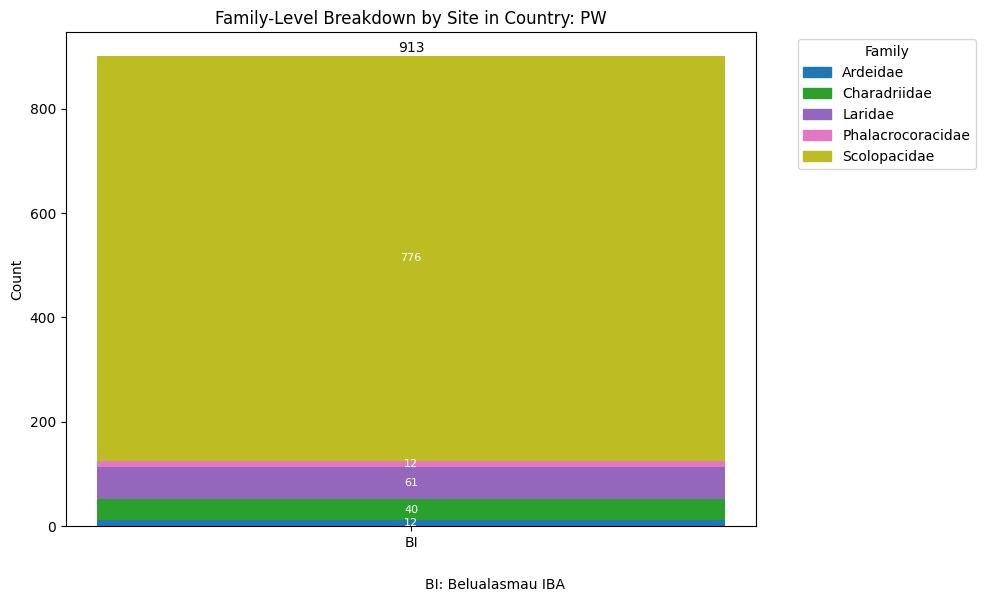

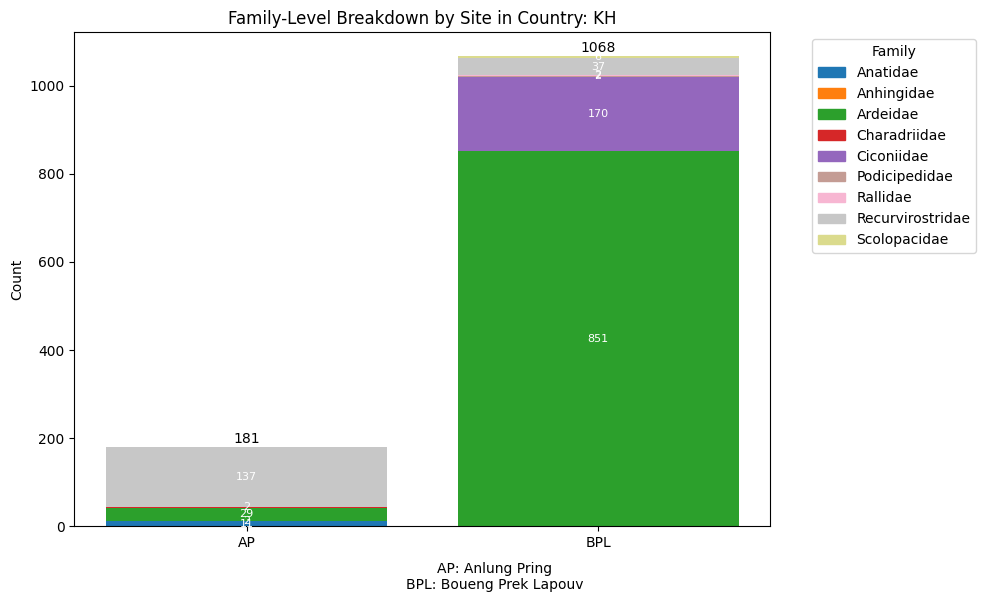

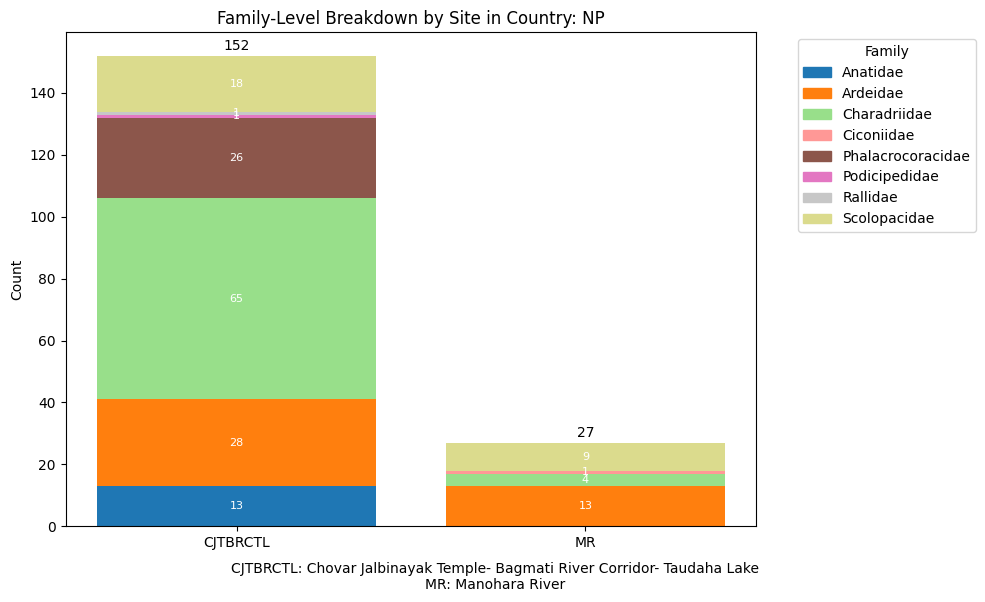

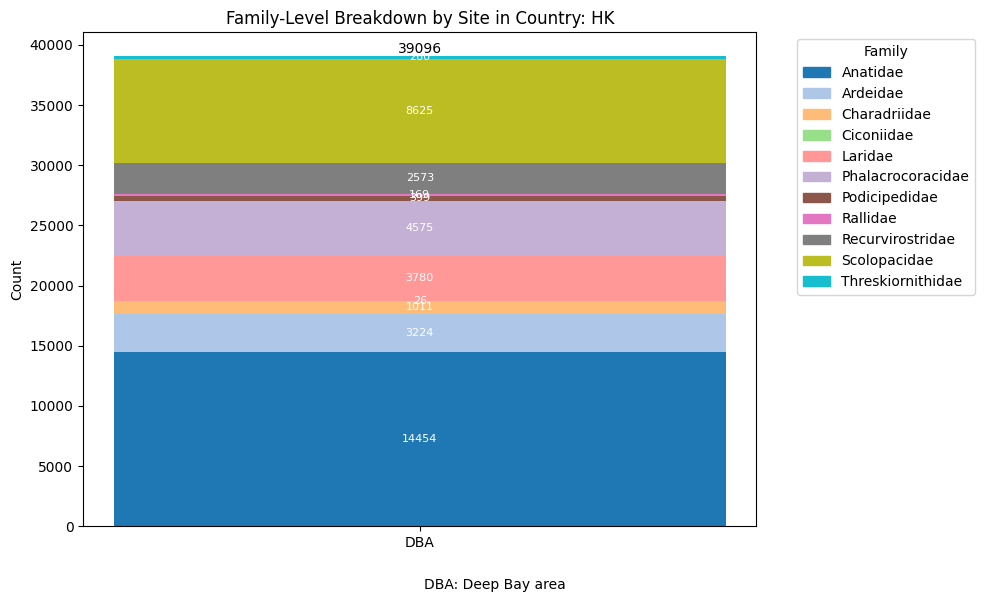

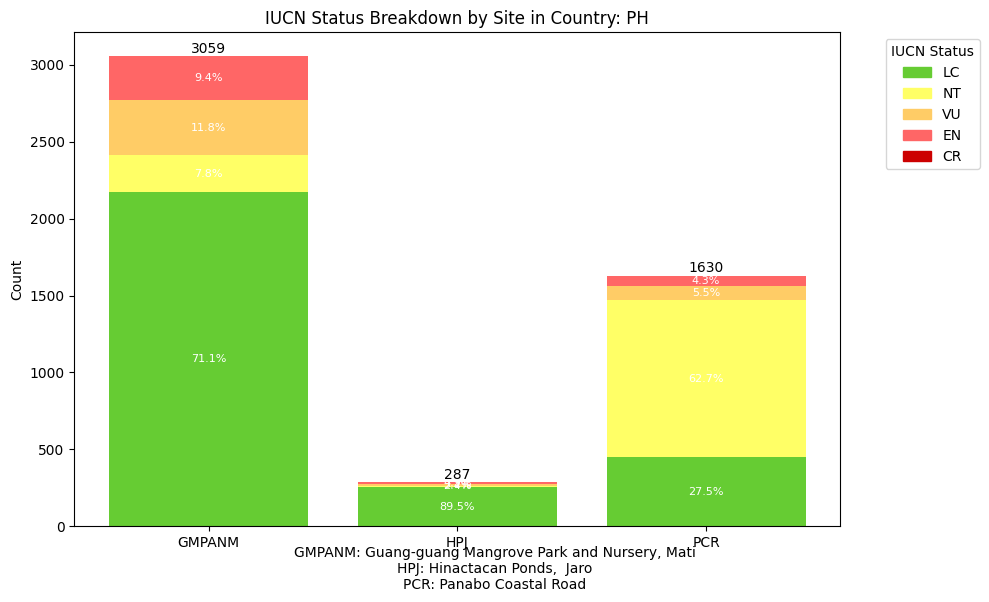

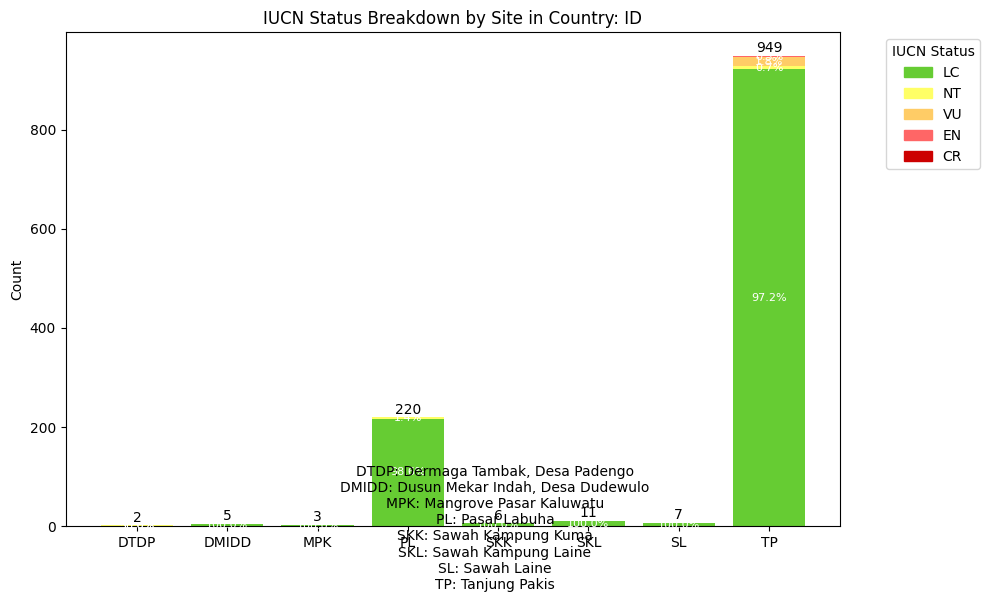

<ipython-input-3-ca23c766b638>:163: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
<ipython-input-3-ca23c766b638>:163: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
<ipython-input-3-ca23c766b638>:163: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarni

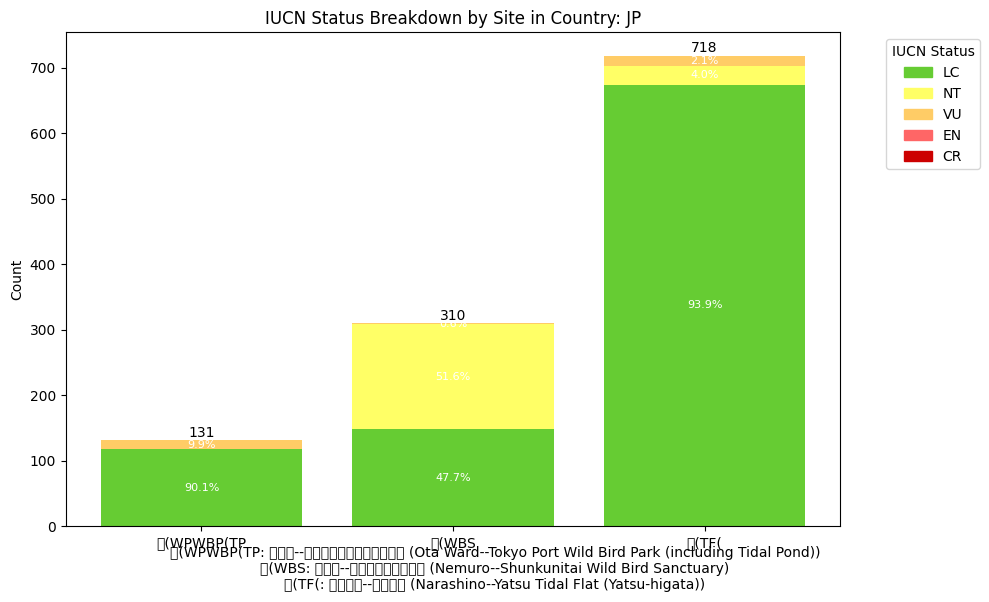

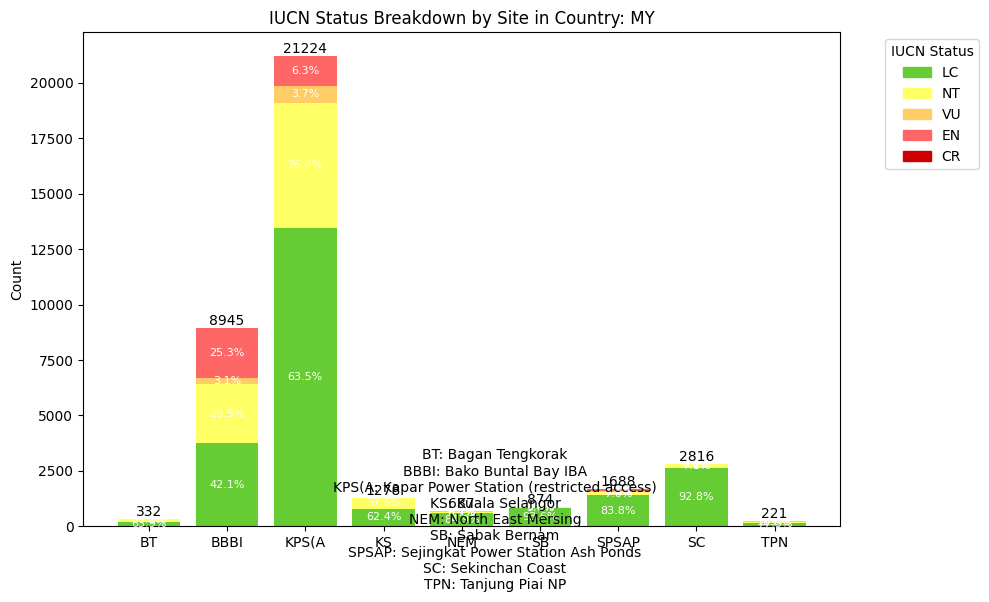

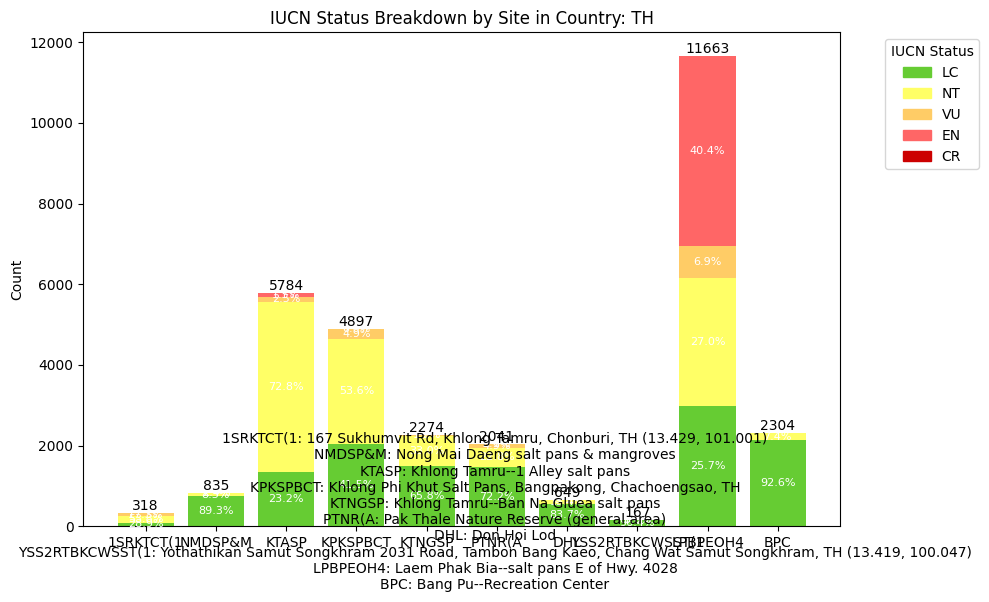

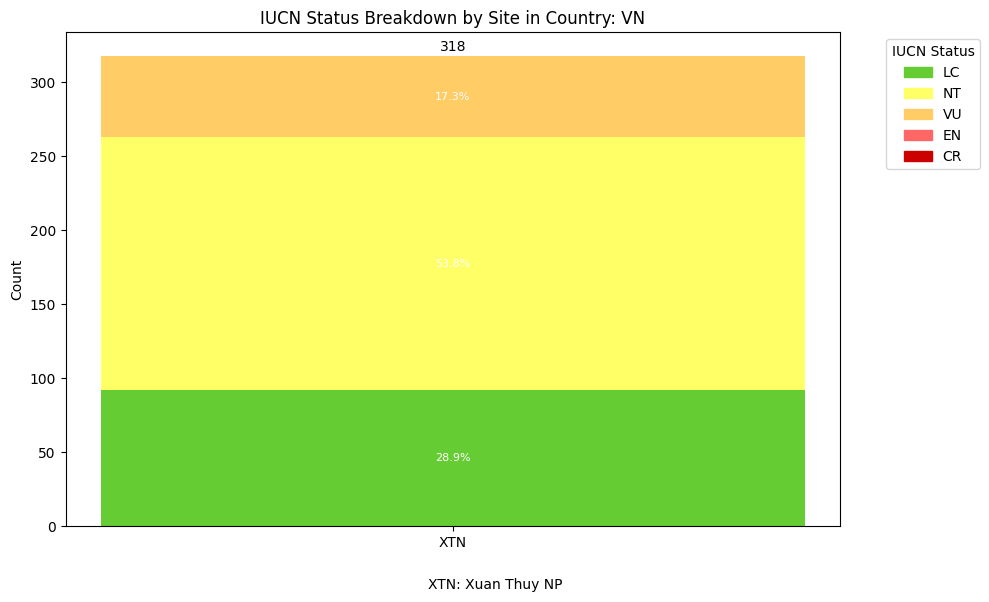

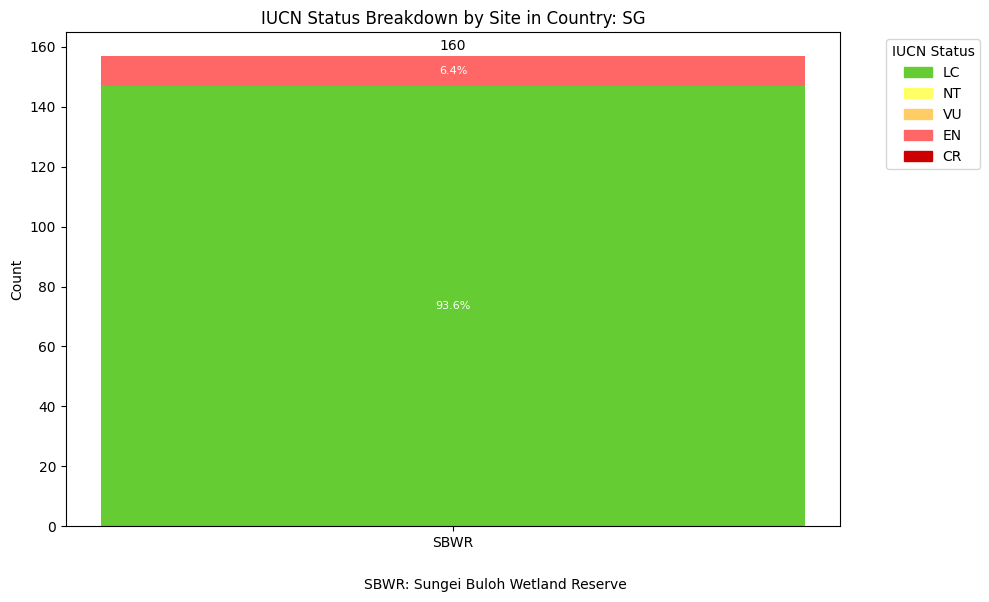

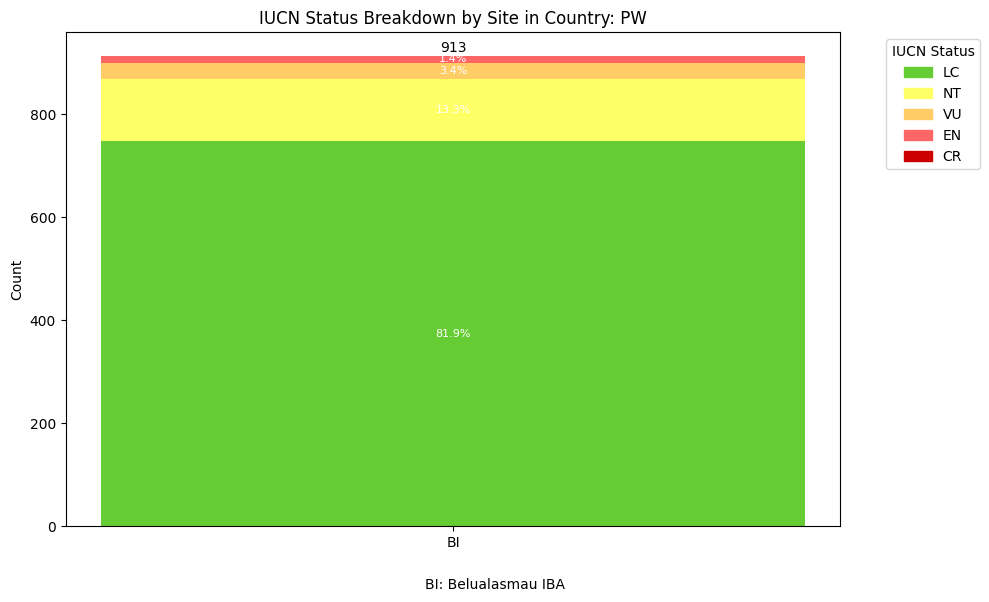

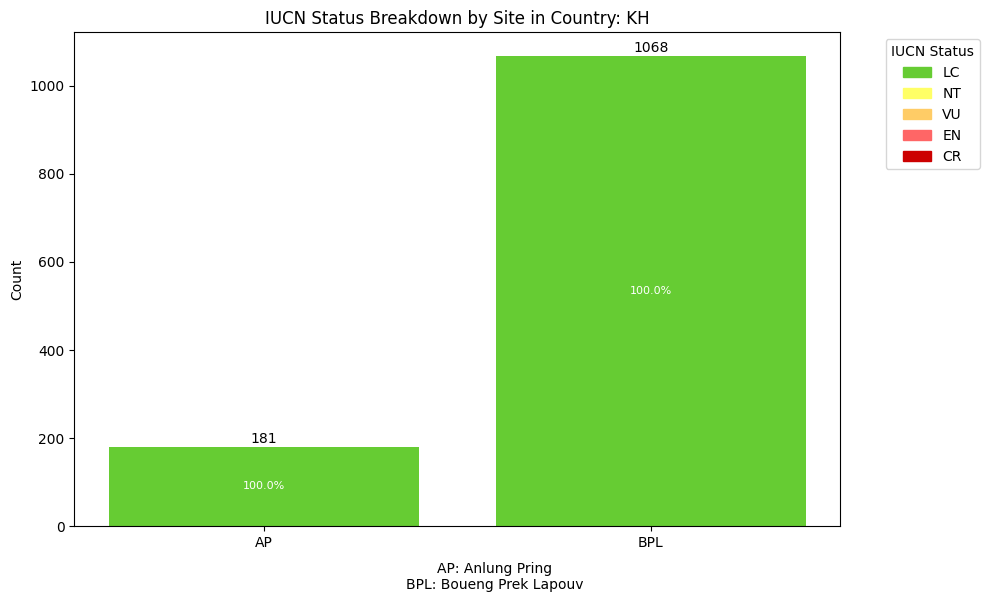

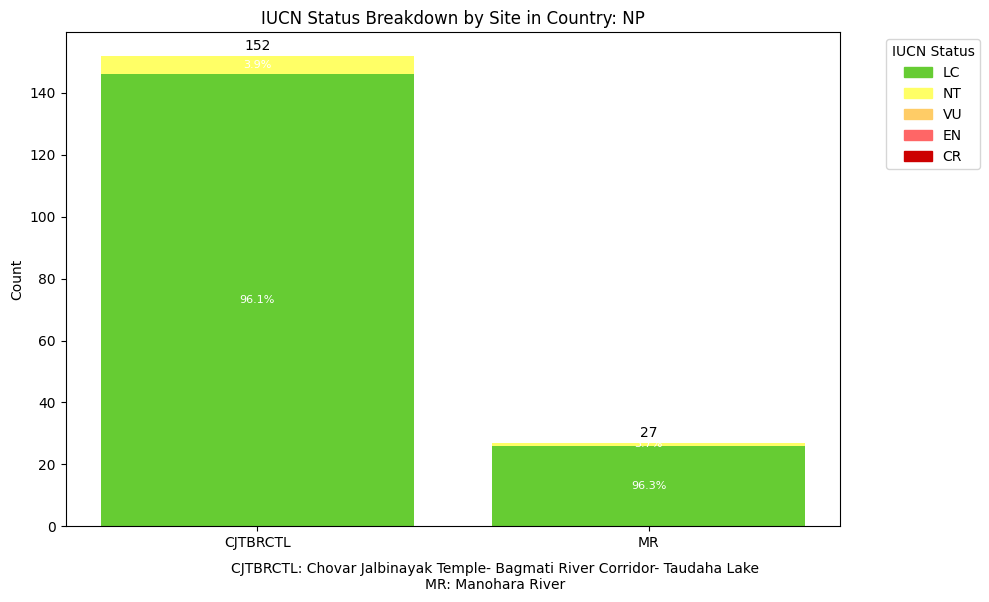

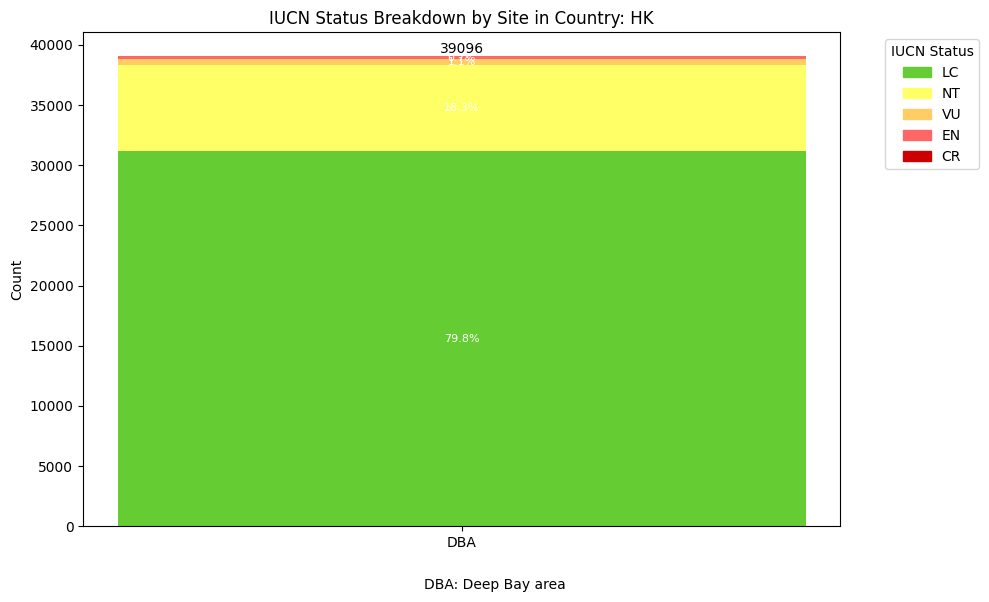

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Data from GitHub
# ------------------------------
url = 'https://raw.githubusercontent.com/thongthornpatch/w3-bird-survey-analysis/main/Dec_2024_eBird_W3_Data_Summary.csv'
data = pd.read_csv(url)

# Print columns for reference
print("Columns in the dataset:", data.columns.tolist())

# ------------------------------
# 2. Define Column Groups
# ------------------------------
# Columns that are not bird families
non_family_columns = [
    'Site Name', 'Country Code',
    'Importance index for species above 1%', 'Combined Importance Index',
    'Key species', 'Total waterbird',
    'LC', 'NT', 'VU', 'EN', 'CR'
]
# The remaining columns are assumed to be bird families
family_columns = [col for col in data.columns if col not in non_family_columns]

# ------------------------------
# 3. Define IUCN Colors (official hex codes)
# ------------------------------
iucn_colors = {
    'LC': '#66cc33',   # Least Concern
    'NT': '#ffff66',   # Near Threatened
    'VU': '#ffcc66',   # Vulnerable
    'EN': '#ff6666',   # Endangered
    'CR': '#cc0000'    # Critically Endangered
}

# ------------------------------
# 4. Helper Function to Generate Acronyms
# ------------------------------
def generate_acronym(site_name, acronym_count):
    """
    Generate an acronym from the first letter of each word in the site name.
    If the acronym is already used, append a number.
    """
    words = site_name.split()
    acr = "".join(word[0].upper() for word in words)
    if acr in acronym_count:
        acronym_count[acr] += 1
        acr = acr + str(acronym_count[acr])
    else:
        acronym_count[acr] = 1
    return acr

# Get unique countries from the data
countries = data['Country Code'].unique()

# ====================================================
# 5. Family-Level Breakdown: Stacked Bar per Country Using Acronyms
# ====================================================
for country in countries:
    df_country = data[data['Country Code'] == country]

    # Create a mapping from full site name to acronym
    acronym_count = {}
    site_acronyms = {}
    for site in df_country['Site Name'].unique():
        acr = generate_acronym(site, acronym_count)
        site_acronyms[site] = acr

    # Get the union of families (with count > 0) across all sites in this country
    families_in_country = set()
    for _, row in df_country.iterrows():
        for fam in family_columns:
            if row[fam] > 0:
                families_in_country.add(fam)
    families_in_country = sorted(list(families_in_country))

    # Assign colors to families using a colormap for consistency
    cmap = plt.get_cmap("tab20")
    n_fams = len(families_in_country)
    family_colors = {fam: cmap(i / n_fams) for i, fam in enumerate(families_in_country)}

    # Create figure with fixed size (equal width for all charts)
    fig, ax = plt.subplots(figsize=(10, 6))
    sites = df_country['Site Name'].tolist()
    # Use acronyms for x-axis labels
    x_labels = [site_acronyms[site] for site in sites]
    x_positions = range(len(sites))

    # Plot each site as a stacked bar
    for i, (_, row) in enumerate(df_country.iterrows()):
        bottom = 0
        for fam in families_in_country:
            count = row[fam] if row[fam] > 0 else 0
            if count > 0:
                ax.bar(i, count, bottom=bottom, color=family_colors[fam])
                ax.text(i, bottom + count/2, str(int(count)),
                        ha='center', va='center', fontsize=8, color='white')
                bottom += count
        total = row['Total waterbird']
        ax.text(i, bottom + 1, f"{int(total)}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels)
    ax.set_ylabel("Count")
    ax.set_title(f"Family-Level Breakdown by Site in Country: {country}")

    # Create legend for families
    handles = [plt.Rectangle((0, 0), 1, 1, color=family_colors[fam]) for fam in families_in_country]
    ax.legend(handles, families_in_country, title="Family", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Prepare and add a text box with the site acronym mapping
    mapping_text = "\n".join([f"{acr}: {site}" for site, acr in site_acronyms.items()])
    plt.figtext(0.5, 0.01, mapping_text, ha="center", fontsize=10)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# ====================================================
# 6. IUCN Status Breakdown: Stacked Bar per Country Using Acronyms
# ====================================================
for country in countries:
    df_country = data[data['Country Code'] == country]

    # Create a mapping from full site name to acronym
    acronym_count = {}
    site_acronyms = {}
    for site in df_country['Site Name'].unique():
        acr = generate_acronym(site, acronym_count)
        site_acronyms[site] = acr

    # Create figure with fixed size
    fig, ax = plt.subplots(figsize=(10, 6))
    sites = df_country['Site Name'].tolist()
    x_labels = [site_acronyms[site] for site in sites]
    x_positions = range(len(sites))

    # Plot each site as a stacked bar for IUCN statuses
    for i, (_, row) in enumerate(df_country.iterrows()):
        bottom = 0
        total_status = row['LC'] + row['NT'] + row['VU'] + row['EN'] + row['CR']
        for status in ['LC', 'NT', 'VU', 'EN', 'CR']:
            count = row[status]
            if count > 0:
                ax.bar(i, count, bottom=bottom, color=iucn_colors[status])
                perc = (count / total_status * 100) if total_status > 0 else 0
                ax.text(i, bottom + count/2, f"{perc:.1f}%",
                        ha='center', va='center', fontsize=8, color='white')
                bottom += count
        ax.text(i, bottom + 1, f"{int(row['Total waterbird'])}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels)
    ax.set_ylabel("Count")
    ax.set_title(f"IUCN Status Breakdown by Site in Country: {country}")

    handles = [plt.Rectangle((0, 0), 1, 1, color=iucn_colors[status]) for status in ['LC', 'NT', 'VU', 'EN', 'CR']]
    ax.legend(handles, ['LC', 'NT', 'VU', 'EN', 'CR'], title="IUCN Status", bbox_to_anchor=(1.05, 1), loc='upper left')

    mapping_text = "\n".join([f"{acr}: {site}" for site, acr in site_acronyms.items()])
    plt.figtext(0.5, 0.01, mapping_text, ha="center", fontsize=10)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()
